In [157]:
#install.packages("ggupset")

In [187]:
library(dplyr)
library(ggplot2)
library(ggupset)
library(UpSetR)

In [271]:
#load data
Mu1_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_1/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_1", .before = GeneID)
Mu2_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_2/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_2", .before = GeneID)
#we skip library 3 - Co125 background!
Mu3_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_3/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_3", .before = GeneID)
Mu4_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_4/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_4", .before = GeneID)
Mu5_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_5/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_5", .before = GeneID)
Mu6_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_6/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_6", .before = GeneID)
Mu7_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_7/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_7", .before = GeneID)
Mu8_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_8/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_8", .before = GeneID)

In [279]:
#merge data
B73_Mu_merged <- bind_rows(
  Mu1_germinal_annotated,
  Mu2_germinal_annotated,
  Mu3_germinal_annotated,
  Mu4_germinal_annotated,
  Mu5_germinal_annotated,
  Mu6_germinal_annotated,
  Mu7_germinal_annotated,
  Mu8_germinal_annotated)

### Overlap of top N Mu species between libraries

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.



,lib,type_candidates,count
,<list>,<list>,<int>
1,Museq_1,Mu8|MuDR,933
2,Museq_1,Mu1,540
3,Museq_1,n2_hmudrA9_hmudrA8,438
4,Museq_1,n3,357
5,Museq_1,n1_UniformMu_hit,305
6,Museq_1,Mu3|Mu4,165


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



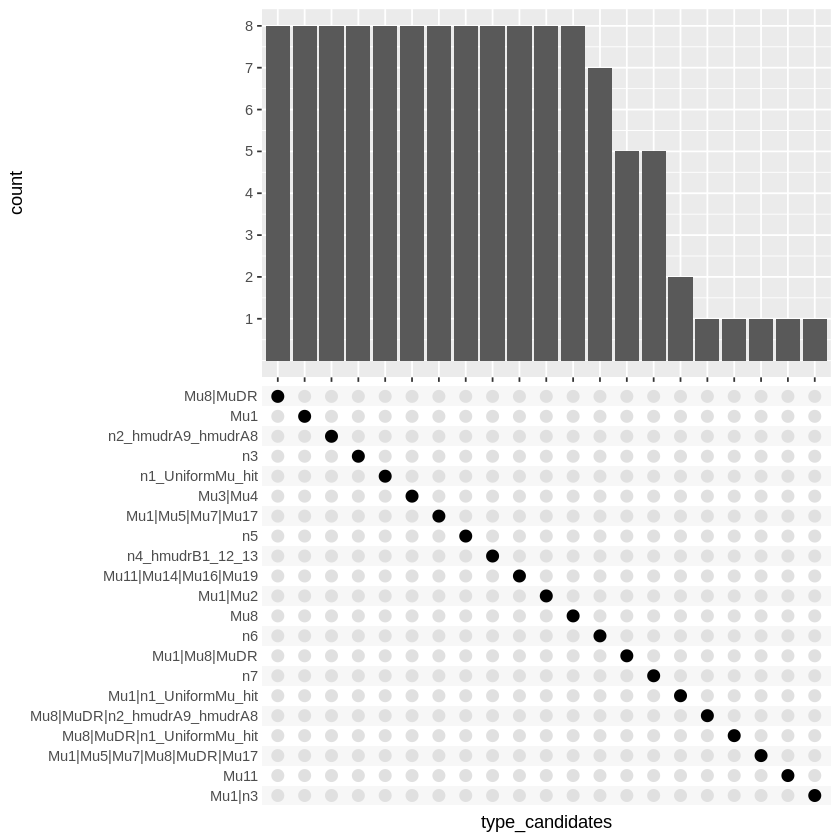

In [281]:
a <- B73_Mu_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  slice(1:15) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) %>%
  mutate(lib = as.list(lib))
#  select(-lib) %>%
#head()


#Mu1 <- a %>% filter(lib == "Mu1") %>% pull(type_candidates)
#Mu2 <- a %>% filter(lib == "Mu2") %>% pull(type_candidates)
#Mu4 <- a %>% filter(lib == "Mu4") %>% pull(type_candidates)
#Mu5 <- a %>% filter(lib == "Mu5") %>% pull(type_candidates)
#Mu6 <- a %>% filter(lib == "Mu6") %>% pull(type_candidates)
#Mu7 <- a %>% filter(lib == "Mu7") %>% pull(type_candidates)
#Mu8 <- a %>% filter(lib == "Mu8") %>% pull(type_candidates)

#c <- list(Mu1 = Mu1, Mu2 = Mu2, Mu4 = Mu4, Mu5 = Mu5, Mu6 = Mu6, Mu7 = Mu7, Mu8 = Mu8)
#c

b <- as.data.frame(a)
head(b)

#upset(c, nsets = 20)


ggplot(a, aes(x=type_candidates)) +
    geom_bar() +
    scale_y_continuous(limit = c(0, 8), breaks = c(1,2,3,4,5,6,7,8)) +
    scale_x_upset(n_intersections = Inf, order_by = "degree")

### Count distribution of top N Mu species between libraries

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.



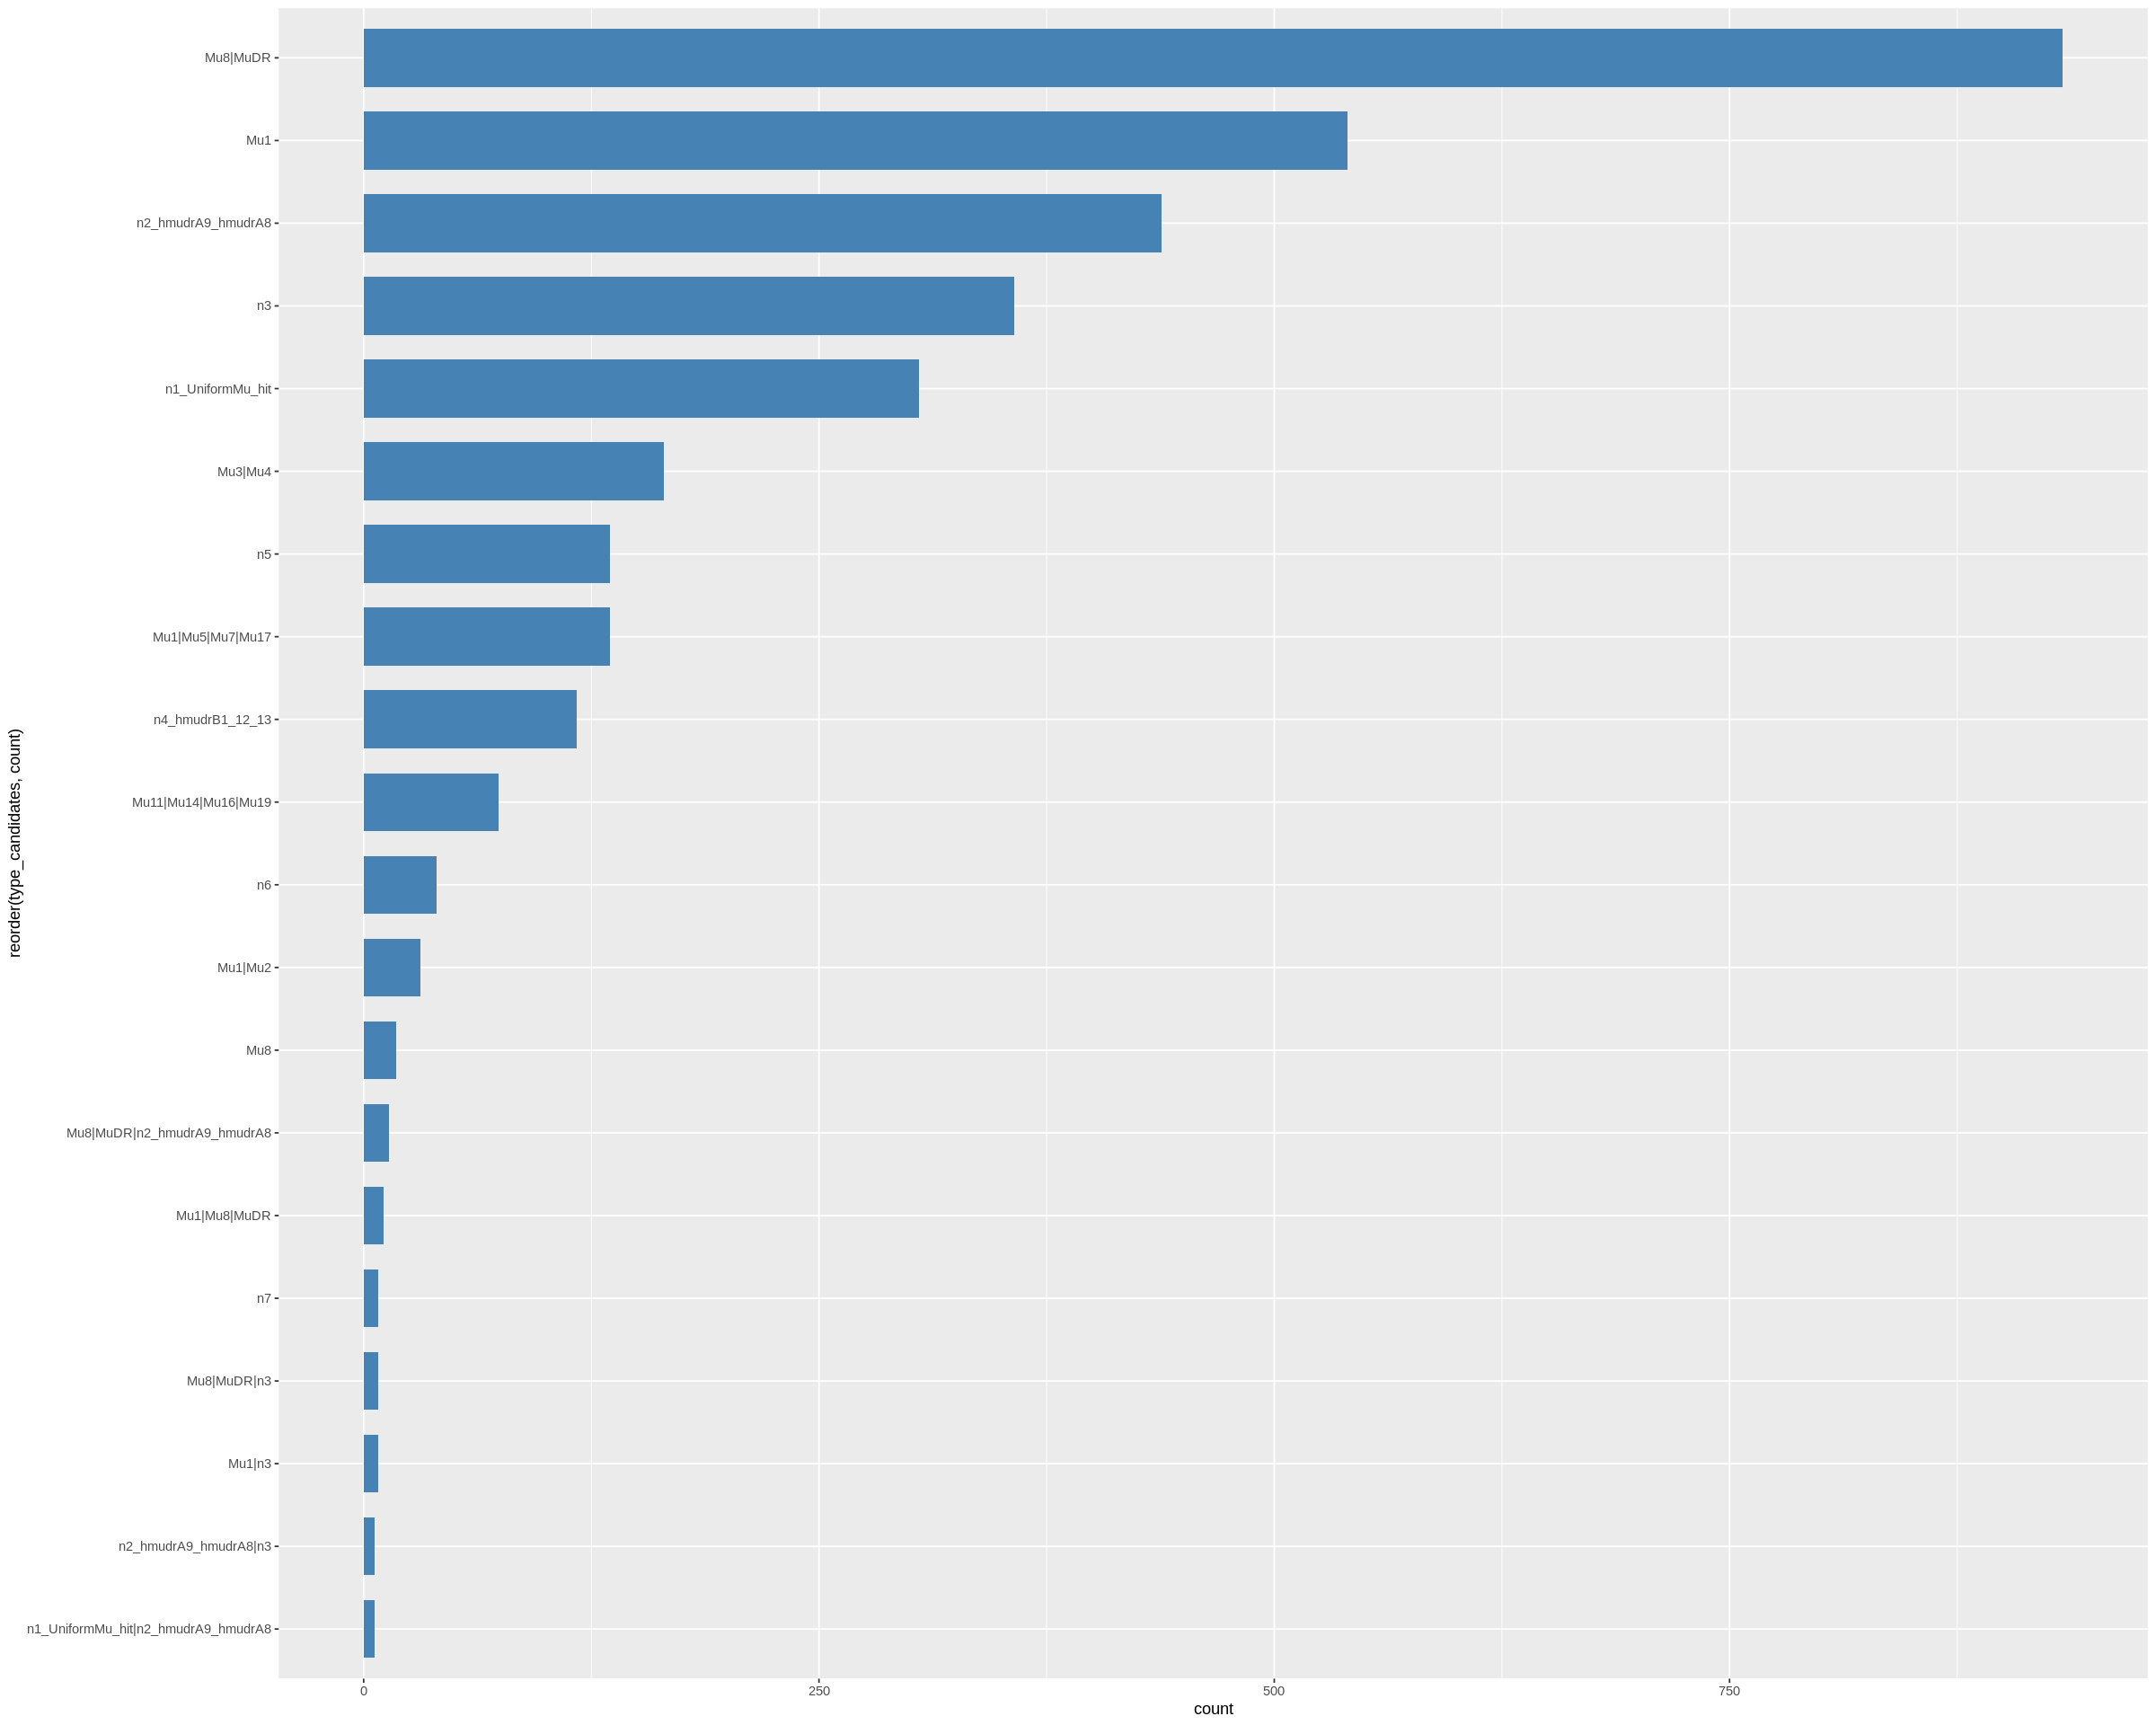

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.



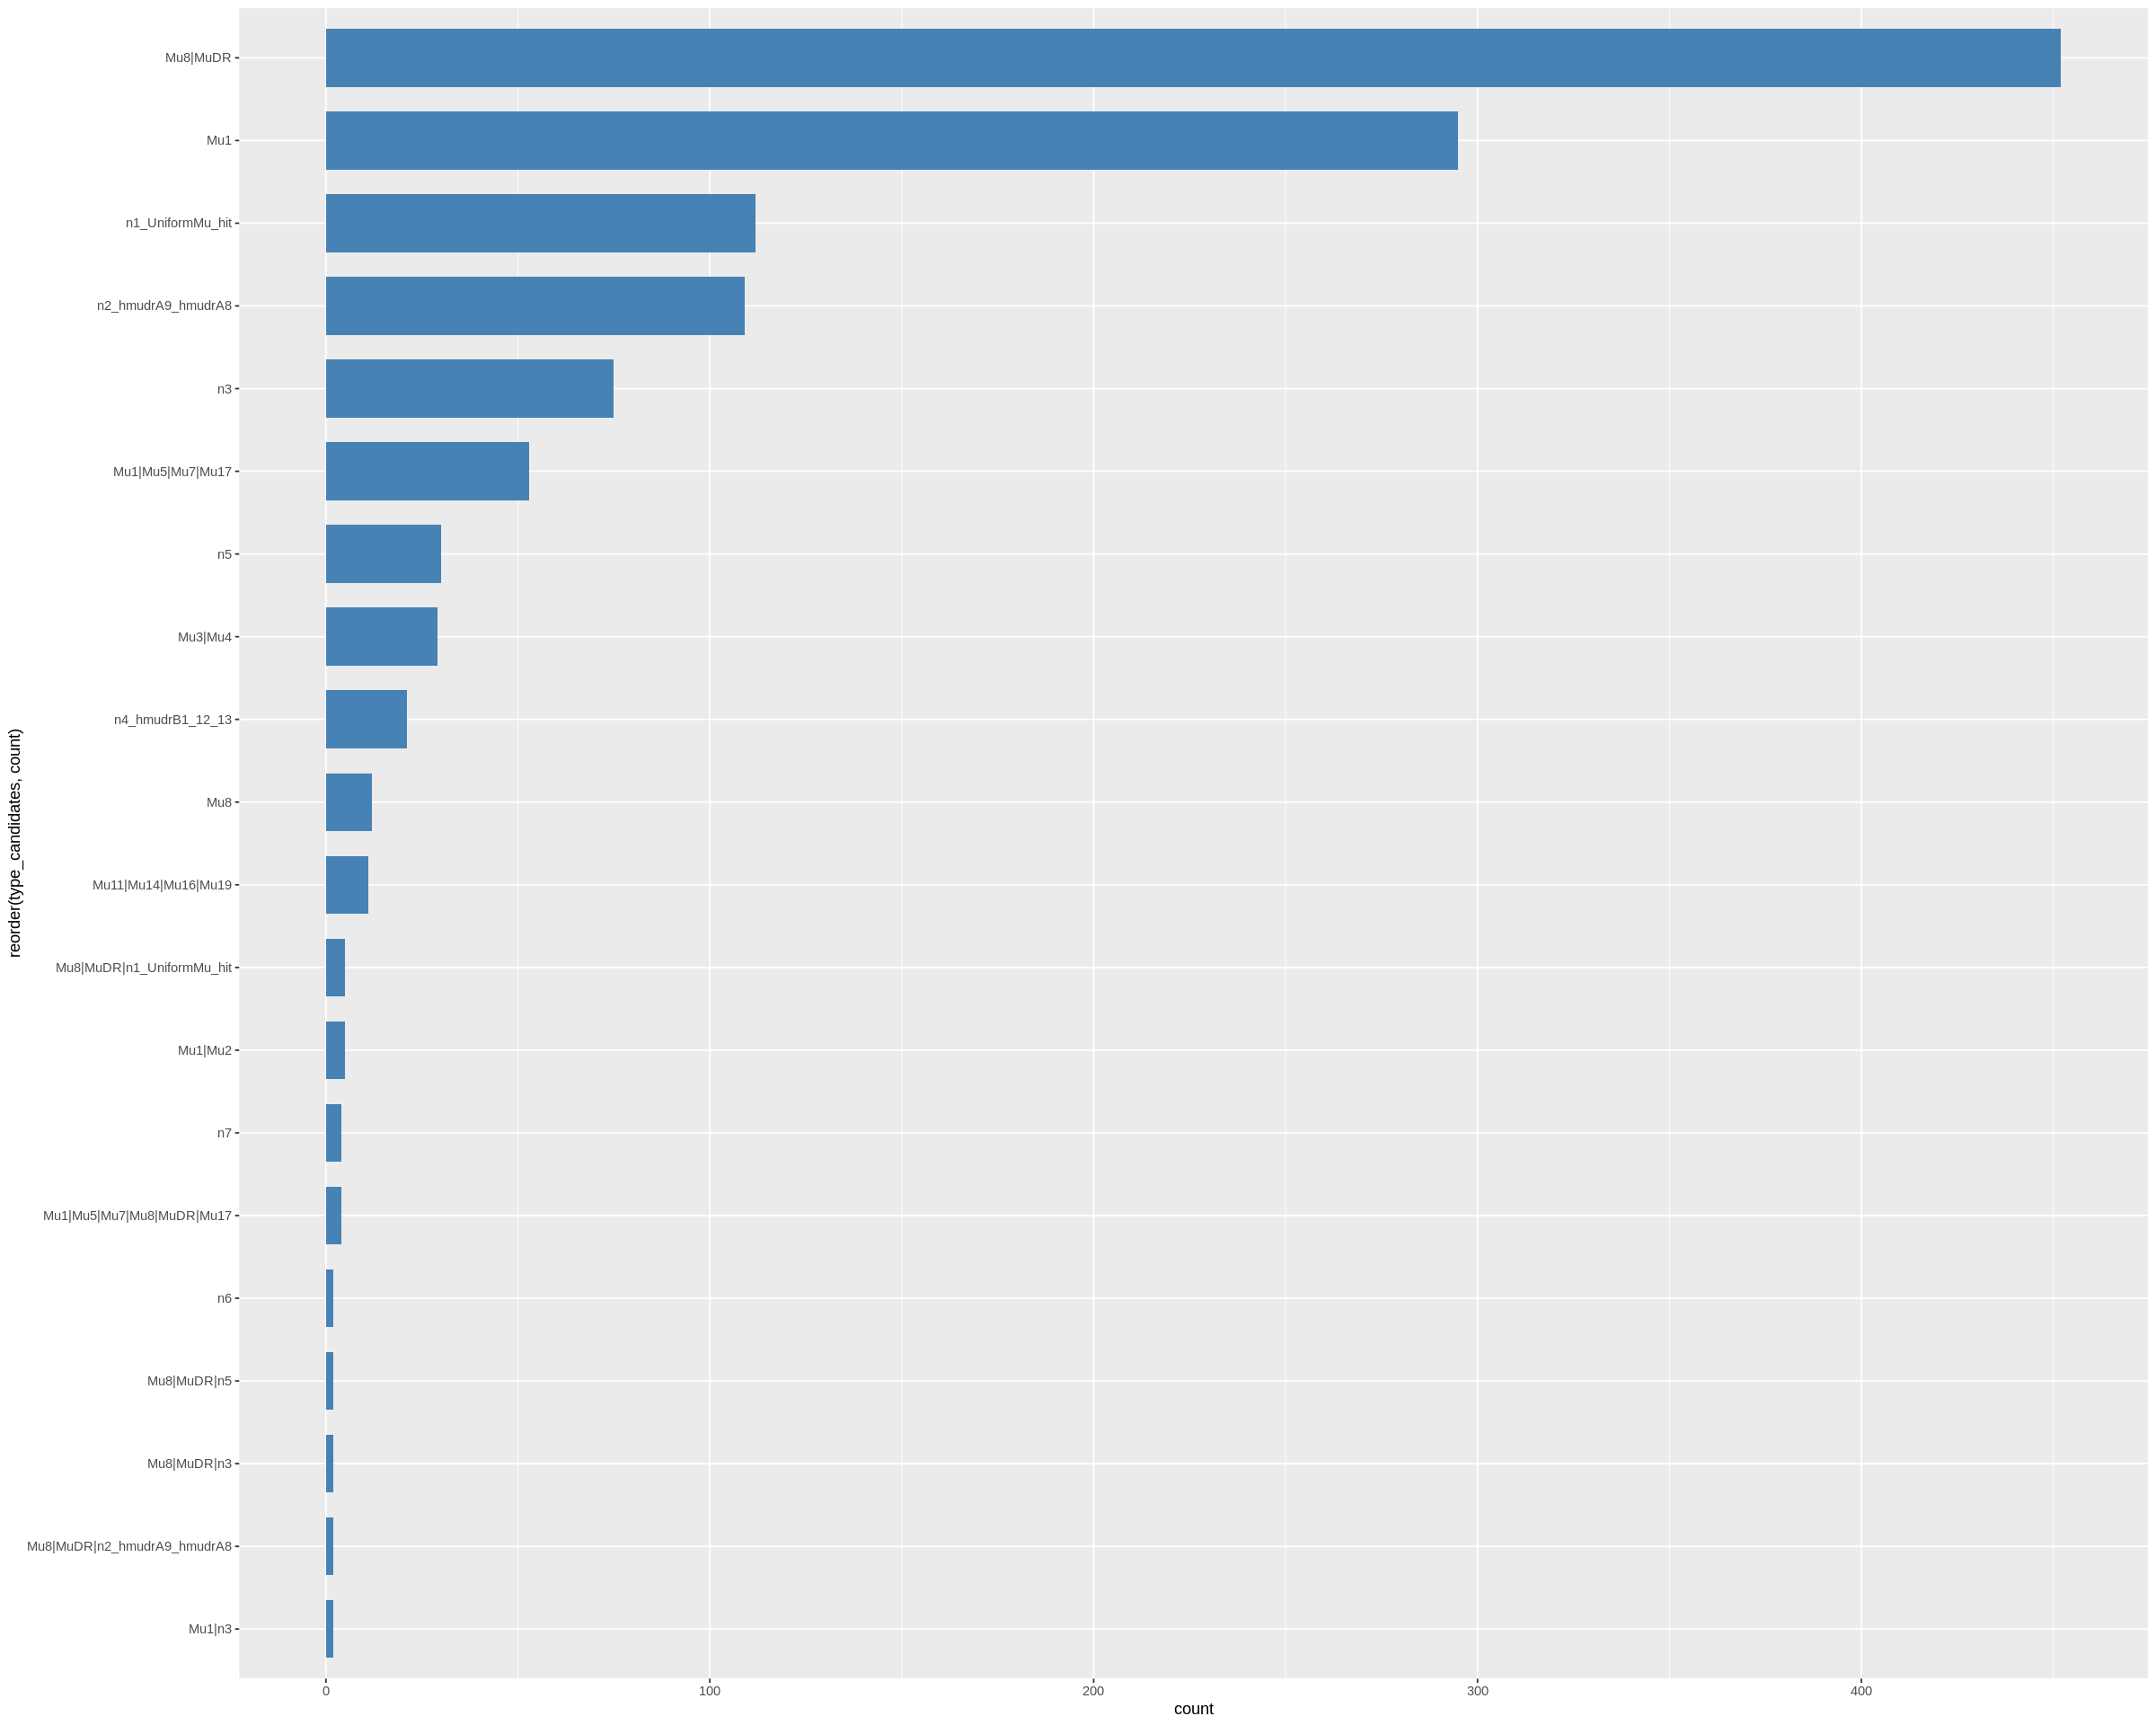

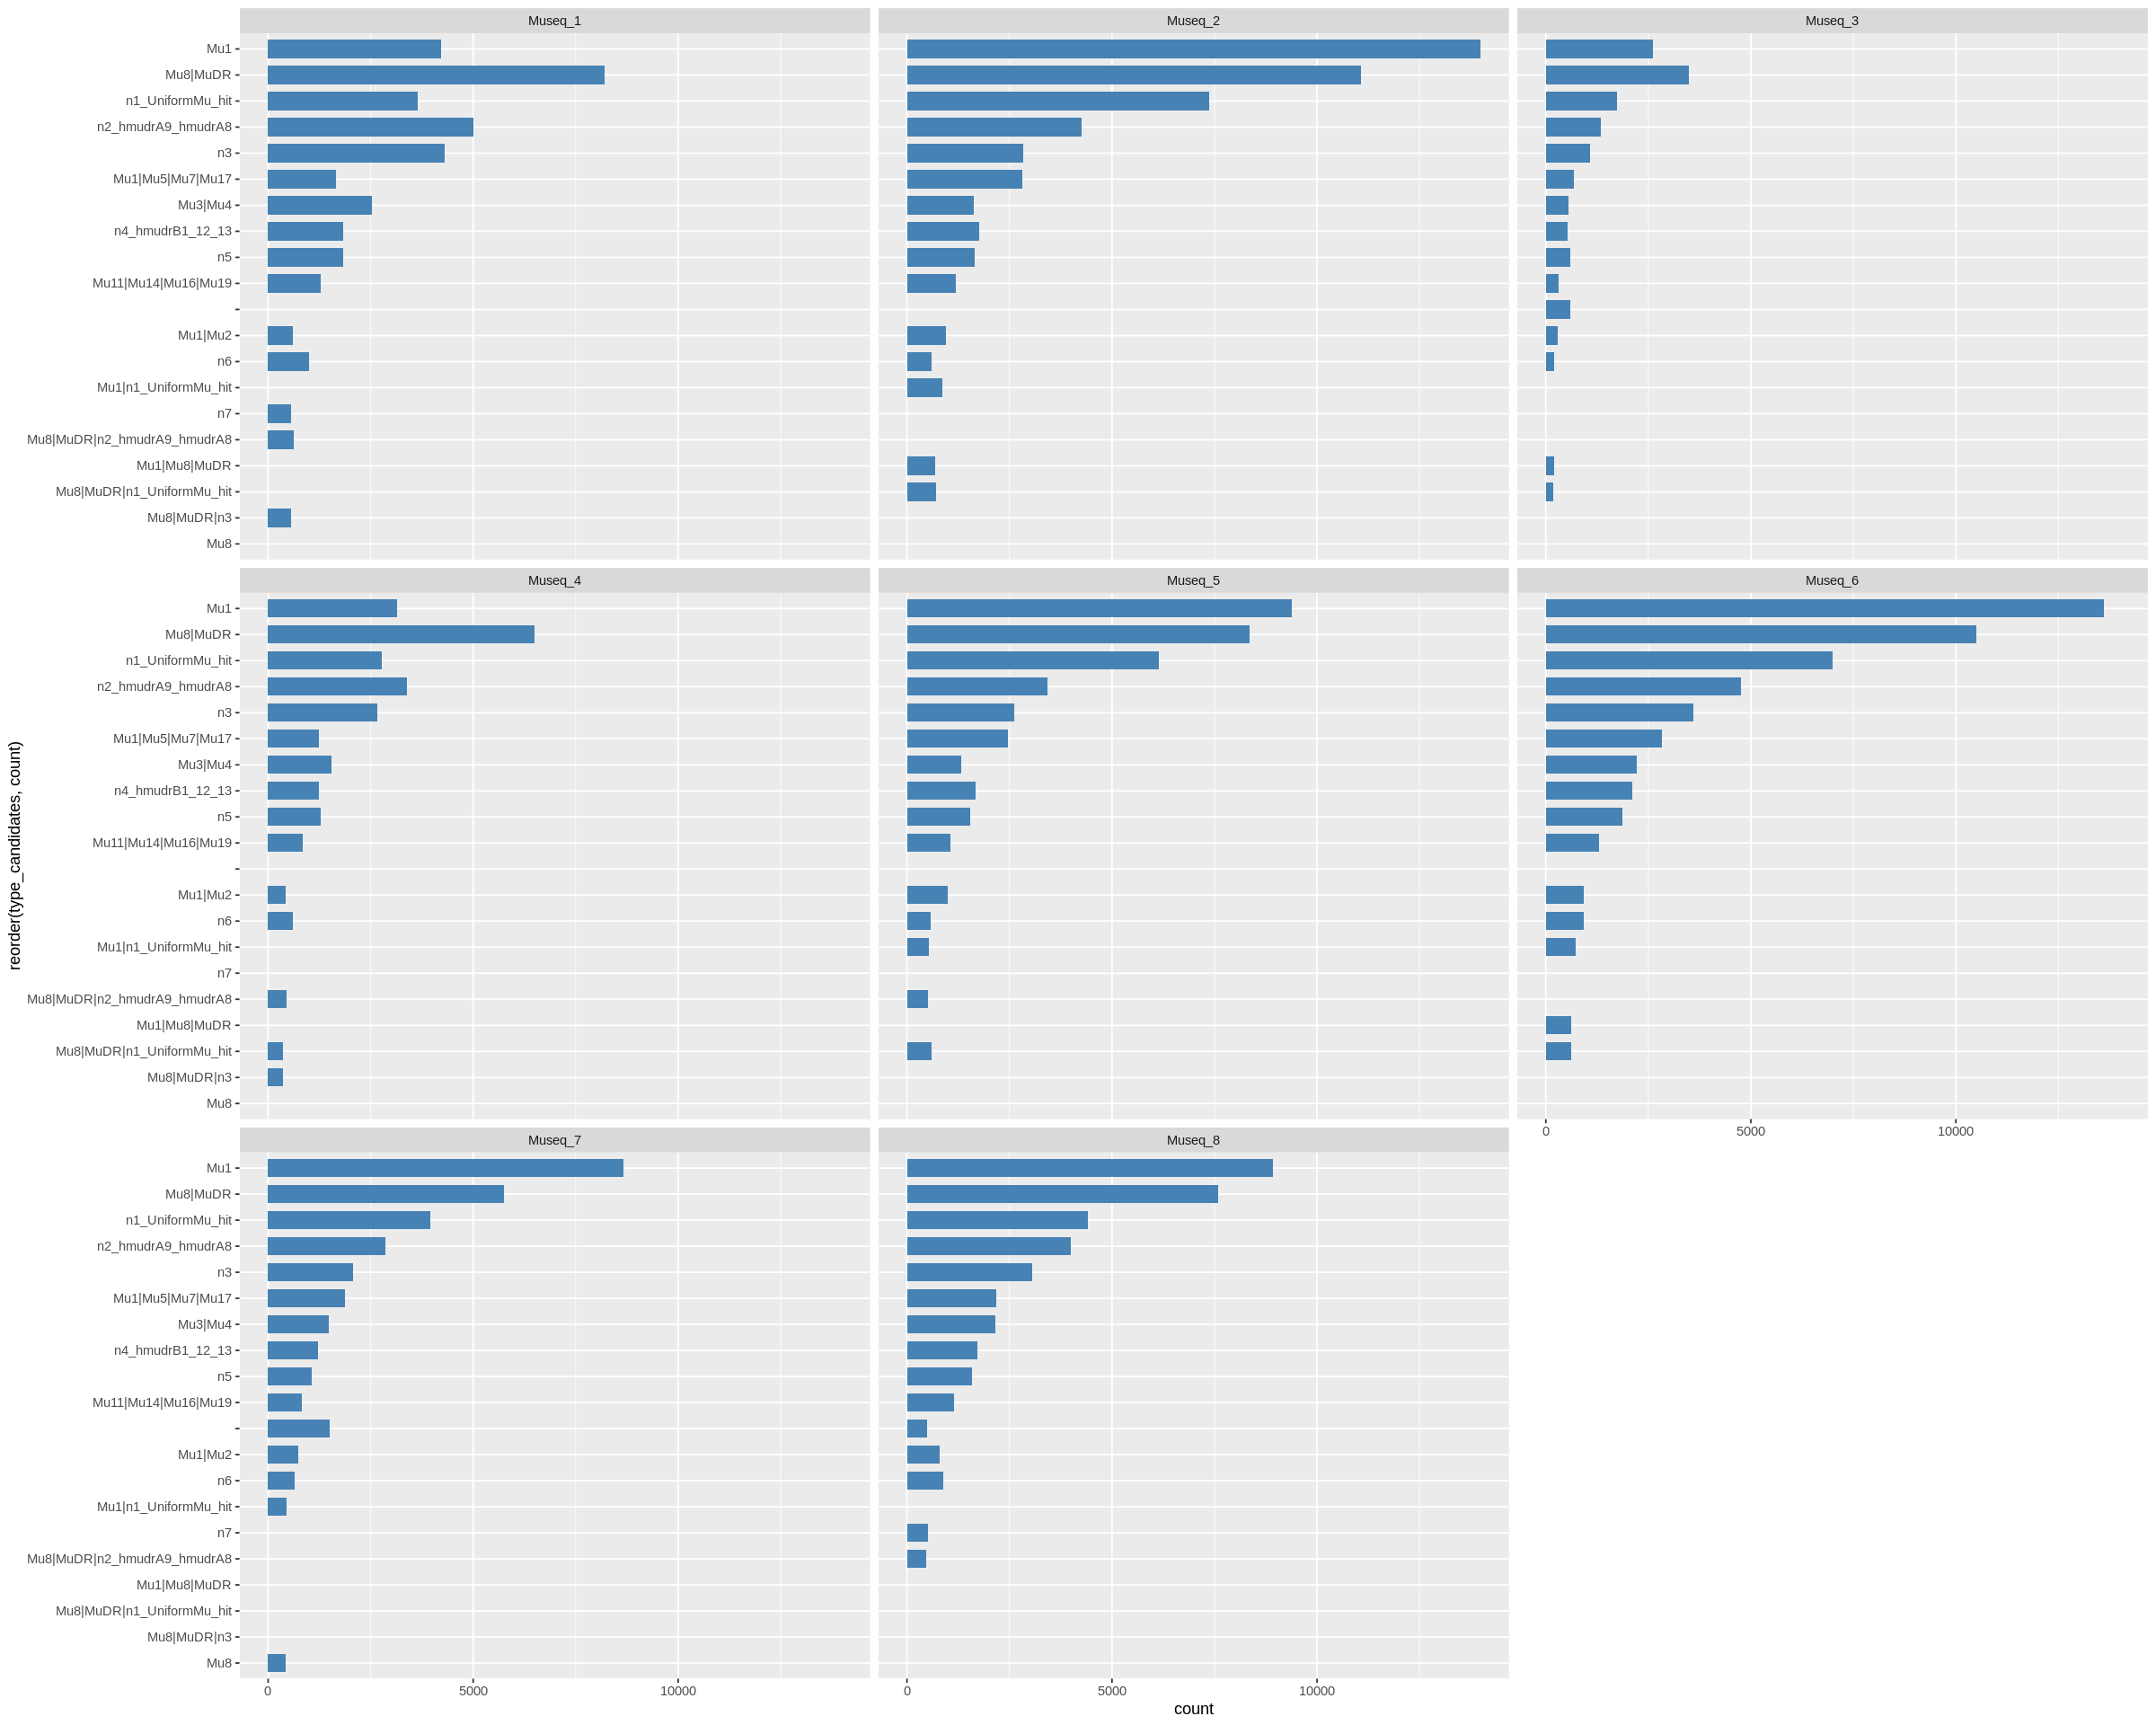

In [285]:
options(repr.plot.width=20, repr.plot.height=16)

B73_Mu_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=20) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip()

B73_Mu_merged %>%
  filter(lib == "Museq_3") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=20) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip()


B73_Mu_merged %>%
#  filter(lib == "Mu1") %>%
#  filter(StartReads >= 5) %>%
#  filter(EndReads >= 5) %>%
#  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  slice(1:15) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip() + 
   facet_wrap(~lib)

### Candidates determination for TE typing validation

In [38]:
?group_by

group_by {dplyr},R Documentation
.data,"A data frame, data frame extension (e.g. a tibble), or a lazy data frame (e.g. from dbplyr or dtplyr). See Methods, below, for more details."
...,"In group_by(), variables or computations to group by. In ungroup(), variables to remove from the grouping."
.add,"When FALSE, the default, group_by() will override existing groups. To add to the existing groups, use .add = TRUE. This argument was previously called add, but that prevented creating a new grouping variable called add, and conflicts with our naming conventions."
.drop,Drop groups formed by factor levels that don't appear in the data? The default is TRUE except when .data has been previously grouped with .drop = FALSE. See group_by_drop_default() for details.
x,A tbl()


In [287]:
B73_Mu_merged %>%
  group_by(lib, Chr, GeneStart, InsertionStart, GeneID, .drop = FALSE)  %>%
  arrange(desc(perc_best_type_of_types)) %>%
 # tally() %>%
  head(n=20)
#  summarise(n = n()) %>%
#  mutate(freq = n / sum(n))
#  summarise(n = n())

lib,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,⋯,all_n_max_value,type_n_max_value,all_TIES,type_TIES,all_max_name,type_max_name,perc_uncategorized,perc_best_type_of_types,all_candidates,type_candidates
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Museq_1,Zm00001eb017170,1,61387117,61392191,Row_22,61391191,61391199,2,4,⋯,3,3,TIED,TIED,TIED,TIED,0,1,Mu8|MuDR,Mu8|MuDR
Museq_1,Zm00001eb032230,1,180154537,180159869,Row_08,180159704,180159712,2,2,⋯,2,2,WINNER,WINNER,n2_hmudrA9_hmudrA8,n2_hmudrA9_hmudrA8,0,1,n2_hmudrA9_hmudrA8,n2_hmudrA9_hmudrA8
Museq_1,Zm00001eb038180,1,204185521,204186811,Col_07,204185549,204185557,2,2,⋯,2,2,WINNER,WINNER,Mu1,Mu1,0,1,Mu1,Mu1
Museq_1,Zm00001eb049890,1,254726957,254730539,Row_11,254727268,254727276,2,2,⋯,2,2,WINNER,WINNER,n3,n3,0,1,n3,n3
Museq_1,Zm00001eb055820,1,277450336,277455246,Col_21,277450978,277450986,2,2,⋯,3,3,TIED,TIED,TIED,TIED,0,1,Mu3|Mu4,Mu3|Mu4
Museq_1,Zm00001eb411810,10,40091350,40095524,Col_11,40095365,40095373,2,2,⋯,3,3,TIED,TIED,TIED,TIED,0,1,Mu8|MuDR,Mu8|MuDR
Museq_1,Zm00001eb426800,10,133794226,133806403,Row_15,133803637,133803645,2,2,⋯,2,2,WINNER,WINNER,n3,n3,0,1,n3,n3
Museq_1,Zm00001eb066560,2,2343617,2353673,Col_17,2343751,2343759,2,2,⋯,3,3,TIED,TIED,TIED,TIED,0,1,Mu8|MuDR,Mu8|MuDR
Museq_1,Zm00001eb068300,2,5299155,5301965,Row_05,5301895,5301903,2,2,⋯,2,2,WINNER,WINNER,n4_hmudrB1_12_13,n4_hmudrB1_12_13,0,1,n4_hmudrB1_12_13,n4_hmudrB1_12_13


In [135]:
B73_Mu_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  filter(type_candidates == "MuDR") %>%
  group_by(lib, Chr, GeneStart, InsertionStart, GeneID)  %>%
  tally() %>%
  arrange(desc(n)) %>%
  filter(n >= 2) %>%
  head(n=40)
#  nrow()

lib,Chr,GeneStart,InsertionStart,GeneID,n
<chr>,<chr>,<int>,<int>,<chr>,<int>


#### Mu1 candidates

In [306]:
B73_Mu_merged %>%
  filter(lib != "Museq_3") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.4) %>%
  filter(type_candidates == "Mu1") %>%
  group_by(lib, Chr, GeneStart, InsertionStart, GeneID)  %>%
  tally() %>%
  arrange(desc(n)) %>%
  filter(n >= 2)

lib,Chr,GeneStart,InsertionStart,GeneID,n
<chr>,<chr>,<int>,<int>,<chr>,<int>
Museq_1,8,58421699,58437197,Zm00001eb341940,2
Museq_2,2,5767267,5768649,Zm00001eb068530,2
Museq_2,2,184771537,184772365,Zm00001eb099320,2
Museq_2,4,136138585,136139763,Zm00001eb183770,2
Museq_2,6,29557734,29558688,Zm00001eb264620,2
Museq_5,1,28542661,28542655,Zm00001eb009240,2
Museq_5,1,235837294,235837391,Zm00001eb045530,2
Museq_5,2,27947647,27947806,Zm00001eb076620,2
Museq_5,7,142050974,142052450,Zm00001eb317510,2


#### n1_Uniform_Mu_hit candidate

In [307]:
B73_Mu_merged %>%
  filter(lib != "Museq_3") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  filter(type_candidates == "n1_UniformMu_hit") %>%
  group_by(lib, Chr, GeneStart, InsertionStart, GeneID)  %>%
  tally() %>%
  arrange(desc(n)) %>%
  filter(n >= 2) %>%
  head(n=20)

lib,Chr,GeneStart,InsertionStart,GeneID,n
<chr>,<chr>,<int>,<int>,<chr>,<int>
Museq_2,1,3762739,3763419,Zm00001eb001130,2
Museq_2,1,201601896,201602002,Zm00001eb037500,2
Museq_2,10,127266336,127270541,Zm00001eb424710,2
Museq_2,2,28435556,28440215,Zm00001eb076830,2
Museq_2,2,30161987,30165342,Zm00001eb077450,2
Museq_2,2,46237772,46240318,Zm00001eb081450,2
Museq_2,2,210827140,210827155,Zm00001eb106460,2
Museq_2,2,230587358,230587891,Zm00001eb113480,2
Museq_2,7,177737141,177757773,Zm00001eb328750,2


#### n2_hmudrA9_hmudrA8

In [347]:
a <- B73_Mu_merged %>%
  filter(lib != "Museq_3") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  filter(type_candidates == "n1_UniformMu_hit") %>%
#  arrange(desc(perc_best_type_of_types)) %>%
  group_by(lib, Chr, GeneStart, InsertionStart, GeneID)  %>%
  tally() %>%
  arrange(desc(n)) %>%
  filter(n >= 2)
nrow(a)


B73_Mu_merged %>%
  dplyr::right_join(., a, by = c("lib", "Chr", "GeneStart", "InsertionStart", "GeneID")) %>%
  group_by(lib, Chr, GeneStart, InsertionStart, GeneID) %>%
  summarise(TotalReads = sum(TotalReads), perc_best_type_of_types = sum(perc_best_type_of_types)/2) %>%
  mutate(proof_reads = TotalReads*perc_best_type_of_types) %>%
  arrange(desc(proof_reads))
#  arrange(desc(TotalReads), .by_group = TRUE)

[1] 39

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart'. You can override using the `.groups` argument.



lib,Chr,GeneStart,InsertionStart,GeneID,TotalReads,perc_best_type_of_types,proof_reads
<chr>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>
Museq_2,1,3762739,3763419,Zm00001eb001130,76,0.3442509,26.163066
Museq_5,3,35674151,35681255,Zm00001eb127580,71,0.3669872,26.056090
Museq_5,3,35680661,35681255,Zm00001eb127590,71,0.3669872,26.056090
Museq_5,5,86095399,86098738,Zm00001eb233000,60,0.4194139,25.164835
Museq_2,2,30161987,30165342,Zm00001eb077450,60,0.3742857,22.457143
Museq_5,5,222475055,222475265,Zm00001eb257970,65,0.3269231,21.250000
Museq_2,2,230587358,230587891,Zm00001eb113480,58,0.3279570,19.021505
Museq_6,3,201690890,201693161,Zm00001eb152910,46,0.3980769,18.311538
Museq_2,1,201601896,201602002,Zm00001eb037500,45,0.4028340,18.127530


In [336]:
?left_join

mutate-joins {dplyr},R Documentation
"x, y","A pair of data frames, data frame extensions (e.g. a tibble), or lazy data frames (e.g. from dbplyr or dtplyr). See Methods, below, for more details."
by,"A character vector of variables to join by. If NULL, the default, *_join() will perform a natural join, using all variables in common across x and y. A message lists the variables so that you can check they're correct; suppress the message by supplying by explicitly. To join by different variables on x and y, use a named vector. For example, by = c(""a"" = ""b"") will match x$a to y$b. To join by multiple variables, use a vector with length > 1. For example, by = c(""a"", ""b"") will match x$a to y$a and x$b to y$b. Use a named vector to match different variables in x and y. For example, by = c(""a"" = ""b"", ""c"" = ""d"") will match x$a to y$b and x$c to y$d. To perform a cross-join, generating all combinations of x and y, use by = character()."
copy,"If x and y are not from the same data source, and copy is TRUE, then y will be copied into the same src as x. This allows you to join tables across srcs, but it is a potentially expensive operation so you must opt into it."
suffix,"If there are non-joined duplicate variables in x and y, these suffixes will be added to the output to disambiguate them. Should be a character vector of length 2."
...,Other parameters passed onto methods.
keep,Should the join keys from both x and y be preserved in the output?
na_matches,"Should NA and NaN values match one another? The default, ""na"", treats two NA or NaN values as equal, like %in%, match(), merge(). Use ""never"" to always treat two NA or NaN values as different, like joins for database sources, similarly to merge(incomparables = FALSE)."
